- Erick Santos                        2021200278
- Marcos Fernandes                    2024000119    

In [49]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          5.0                         
year           2025                        
month          04                          
day            11                          
svn rev        88135                       
language       R                           
version.string R version 4.5.0 (2025-04-11)
nickname       How About a Twenty-Six      

In [2]:
# Instalação dos pacotes
install.packages("tidyverse")
install.packages("lubridate")
install.packages("ggplot2")
install.packages("forecast")
install.packages("zoo")
install.packages("random")
install.packages("ggthemes")
install.packages("DescTools")

# Carregamento dos pacotes
library(tidyverse)
library(lubridate)
library(ggplot2)
library(forecast)
library(zoo)
library(random)
library(ggthemes)
library(DescTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’


── Attaching core tidyverse packages ──────────────────────── tid

In [50]:
# Carregar pacotes necessários
library(tidyverse)
library(lubridate)

# Definir o período de datas
start_date <- as.Date("2023-01-01")
end_date <- as.Date("2023-12-31")

# Calcular o número de dias no período
num_days <- as.integer(end_date - start_date) + 1

# Gerar 1000 datas aleatórias dentro do período
set.seed(123)  # Para reprodutibilidade
random_dates <- start_date + days(sample(0:(num_days - 1), 1000, replace = TRUE))

# Criar o data frame
df <- tibble(
  Data = random_dates,
  Item = sample(1:5, 1000, replace = TRUE),
  Total = sample(50:500, 1000, replace = TRUE)
)

# Imprimir o data frame
print(df)

# A tibble: 1,000 × 3
   Data        Item Total
   <date>     <int> <int>
 1 2023-06-28     5   195
 2 2023-01-14     4   268
 3 2023-07-14     5   346
 4 2023-11-02     5   272
 5 2023-04-28     1   124
 6 2023-10-26     2   398
 7 2023-08-17     5   114
 8 2023-09-01     1    56
 9 2023-01-14     5    95
10 2023-06-02     4   212
# ℹ 990 more rows


In [51]:
# Calculos
media <- mean(df$Total)
mediana <- median(df$Total)
d_padrao <- sd(df$Total)
menor_valor <- min(df$Total)
maior_valor <- max(df$Total)
item_menor <- df$Item[which.min(df$Total)]
item_maior <- df$Item[which.max(df$Total)]
moda <- as.numeric(names(which.max(table(df$Total))))
valor_total_estoque <- sum(df$Total)
qtd_categoria <- length(unique(df$Item))

# Exibir e salvar os resultados
cat(sprintf("Média: %.2f\n", media))
cat(sprintf("Mediana: %.2f\n", mediana))
cat(sprintf("Desvio Padrão: %.2f\n", d_padrao))


Média: 265.82
Mediana: 260.50
Desvio Padrão: 129.46


In [52]:
arquivo_saida <- "resumo_vendas.txt" # Nome e extensao do arquivo

# Redirecionar a saída para o arquivo
sink(arquivo_saida) # salvando no arquivo
cat("\n======================= PLUS =======================\n")
cat(sprintf("Contagem de Categorias/itens: %.f\n", qtd_categoria))
cat(sprintf("Moda: %.2f\n", moda))
cat(sprintf("O item/categoria %s possui o menor valor: %.2f\n", item_menor, menor_valor))
cat(sprintf("O item/categoria %s possui o maior valor: %.2f\n", item_maior, maior_valor))
cat(sprintf("Valor Total Venda: %.2f\n", valor_total_estoque))

cat("\n========== Resumo ==========\n")
print(summary(df$Total))


sink()


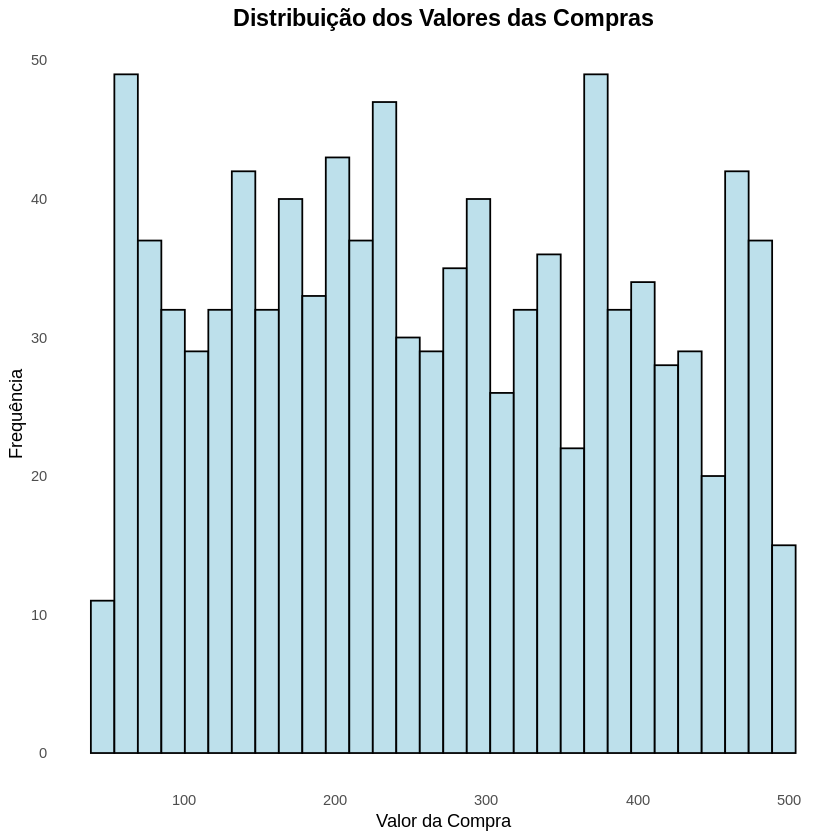

In [53]:
#Histograma (2 ponto): Distribuição dos valores das compras.


library(ggplot2)

ggplot(df, aes(x = Total)) +
  geom_histogram(bins = 30, fill = "lightblue", color = "black", alpha = 0.8) +
  labs(
    title = "Distribuição dos Valores das Compras",
    x = "Valor da Compra",
    y = "Frequência"
  ) +
  theme_minimal()+
theme(
    panel.grid.major = element_blank(),  # remove grade maior
    panel.grid.minor = element_blank(),   # remove grade menor
    plot.title = element_text(hjust = 0.5,size = 14, face = "bold")
  )

# Salvando no arquivo
ggsave("histograma_valores_compras.png", width = 8, height = 6, dpi = 300)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_line()`).”


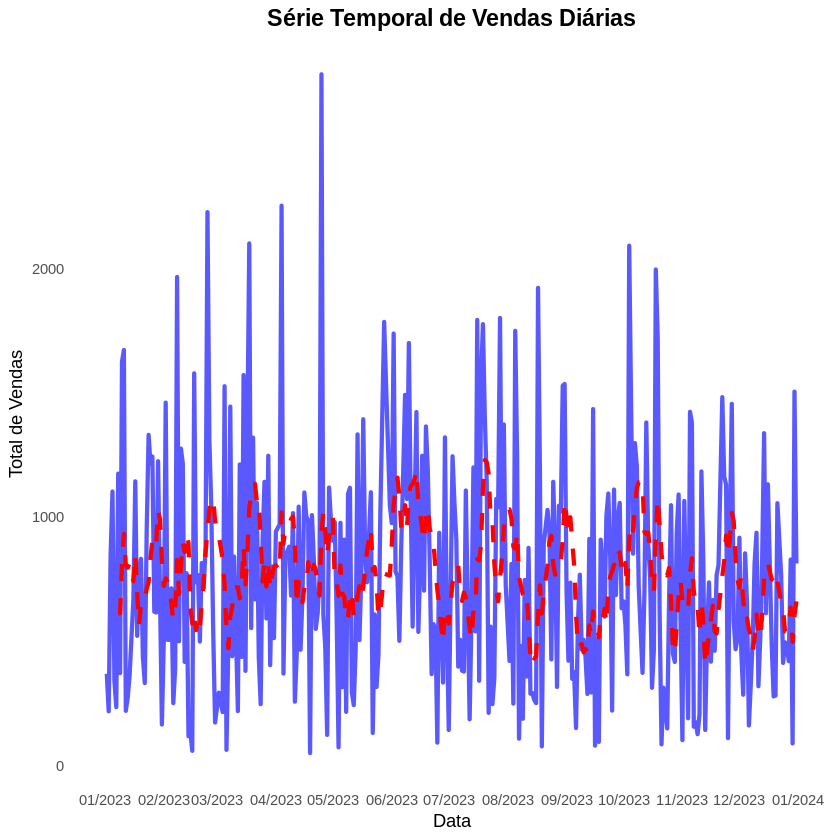

In [62]:
#• Série Temporal (1,5 pontos): Vendas diárias com linha de tendência (média móvel).

library(dplyr)
library(ggplot2)
library(zoo)
library(lubridate)

# Garantir que a coluna Data está em formato Date
df <- df %>% mutate(Data = as.Date(Data))

# Agrupar por data e somar as vendas
df_diario <- df %>%
  group_by(Data) %>%
  summarise(total_diario = sum(Total), .groups = "drop") %>%
  arrange(Data)

# Calcular a  média móvel com um intervalo de 7 dias
df_diario <- df_diario %>%
  mutate(media_movel = rollmean(total_diario, k = 7, fill = NA, align = "right"))

# Plotar série temporal com linha de tendência
ggplot(df_diario, aes(x = Data)) +
  geom_line(aes(y = total_diario), color = "blue", size = 1.2, alpha = 0.65) +
  geom_line(aes(y = media_movel), color = "red", linetype = "dashed", size = 1.2) +
  labs(
    title = "Série Temporal de Vendas Diárias",
    x = "Data",
    y = "Total de Vendas"
  ) +
  theme_minimal() +
  theme(
    legend.position = "top",
    plot.title = element_text(hjust = 0.5, face = "bold", size = 14),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
 scale_x_date(date_labels = "%m/%Y", date_breaks = "1 month")



ggsave("Série Temporal de Vendas Diárias.png", width = 8, height = 6, dpi = 300)

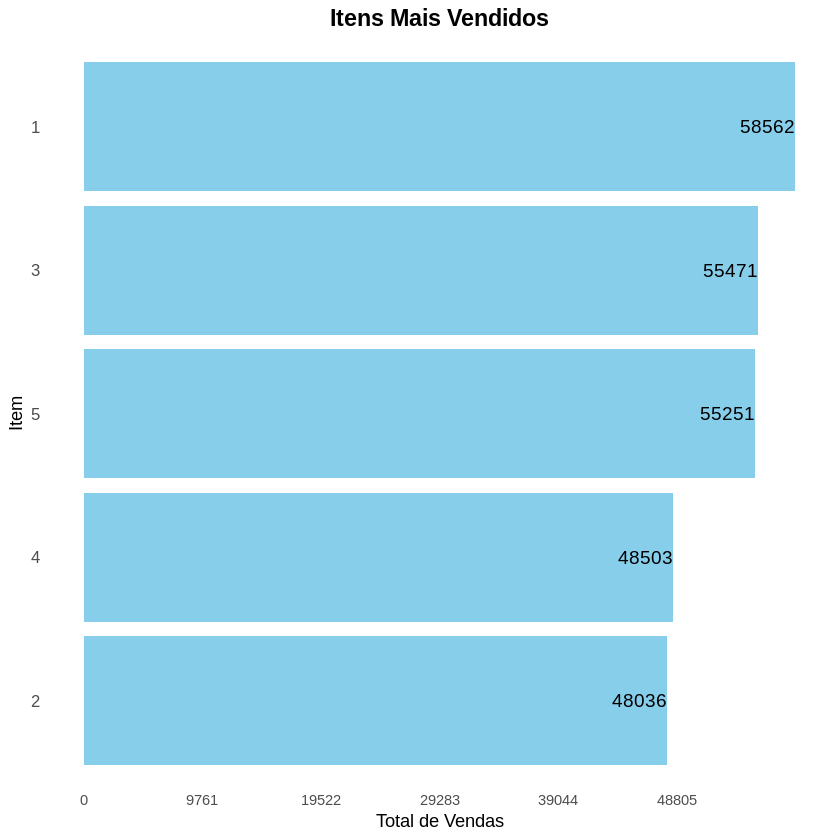

In [56]:
library(dplyr)
library(ggplot2)
library(scales)

# Agrupar por Item e somar o Total
df_itens <- df %>%
  group_by(Item) %>%
  summarise(TotalVendas = sum(Total), .groups = "drop") %>%
  arrange(desc(TotalVendas))

# Criar os ticks do eixo X manualmente
max_val <- max(df_itens$TotalVendas)
intervalo <- ceiling(max_val / 6)
ticks_x <- seq(0, max_val, by = intervalo)
labels_x <- sprintf("%.0f", ticks_x)

# Converter Item para fator (ordem reversa)
df_itens <- df_itens %>%
  mutate(Item = factor(Item, levels = rev(unique(Item))))

# Gráfico de barras horizontais com estética e controle de eixos
ggplot(df_itens, aes(x = TotalVendas, y = Item)) +
  geom_col(fill = "skyblue") +
  geom_text(aes(label = sprintf("%.0f", TotalVendas)), hjust = 1, size = 4) + #Rotulos dos dados
  labs(
    title = "Itens Mais Vendidos",
    x = "Total de Vendas",
    y = "Item"
  ) +

  scale_x_continuous(breaks = ticks_x, labels = labels_x) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    axis.text.y = element_text(size = 10),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )

  ggsave("Itens Mais Vendidos.png", width = 8, height = 6, dpi = 300)


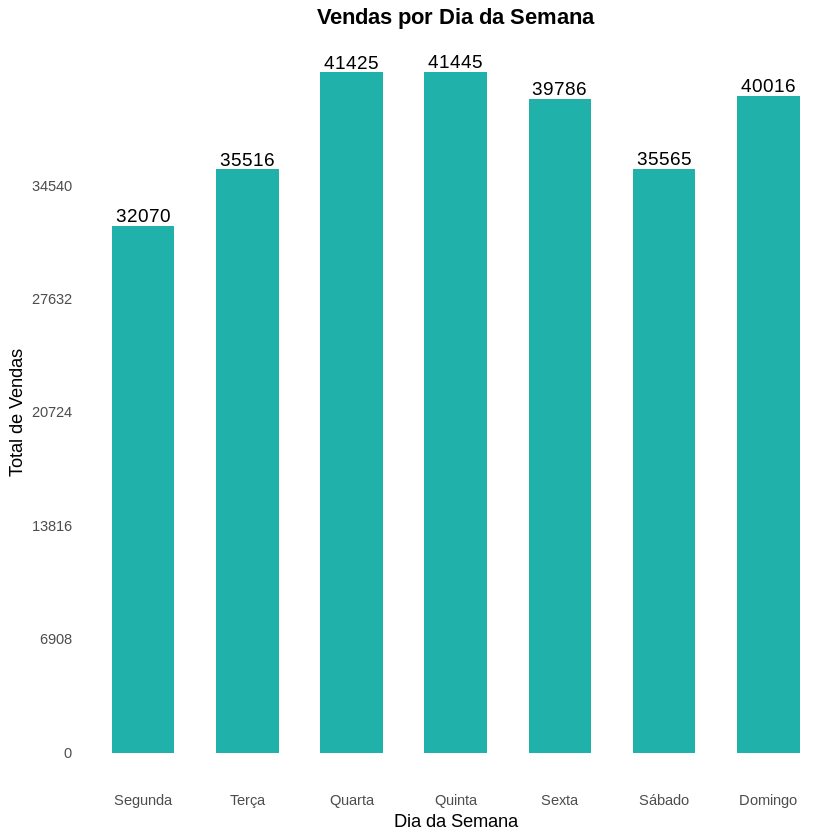

In [57]:
library(dplyr)
library(ggplot2)
library(lubridate)
library(forcats)

df <- df %>%
  mutate(Data = as.Date(Data)) #Garantindo que a  Data esta em formato Date

# Traduzindo os dias para PT-BR
dias_em_portugues <- c(
  "Monday" = "Segunda",
  "Tuesday" = "Terça",
  "Wednesday" = "Quarta",
  "Thursday" = "Quinta",
  "Friday" = "Sexta",
  "Saturday" = "Sábado",
  "Sunday" = "Domingo"
)

df <- df %>%
  mutate(dia_semana = dias_em_portugues[weekdays(Data)])

#Agrupando por dia da semana e somar as vendas
df_semana <- df %>%
  group_by(dia_semana) %>%
  summarise(total_vendido = sum(Total), .groups = "drop")

# Ordenando os dias
ordem_dias <- c("Segunda", "Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo")
df_semana <- df_semana %>%
  mutate(dia_semana = factor(dia_semana, levels = ordem_dias))

# Formatando eixo Y
max_val <- max(df_semana$total_vendido)
intervalo <- ceiling(max_val / 6)
ticks <- seq(0, max_val, by = intervalo)
labels_y <- sprintf("%.0f", ticks)

ggplot(df_semana, aes(x = dia_semana, y = total_vendido)) +
  geom_col(fill = "lightseagreen", width = 0.6) +
  geom_text(aes(label = sprintf("%.0f", total_vendido)), vjust = -0.3, size = 4) + #Rotulos das colunas com os valores
  scale_y_continuous(breaks = ticks, labels = labels_y) +
  labs(
    title = "Vendas por Dia da Semana",
    x = "Dia da Semana",
    y = "Total de Vendas"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()

  )

    ggsave("Vendas por Dia da Semana.png", width = 8, height = 6, dpi = 300)


In [58]:
# Removendo Arquivos criados no código
arquivos <- c("histograma_valores_compras.png", "resumo_vendas.txt","Série Temporal de Vendas Diárias.png","Itens Mais Vendidos.png","Vendas por Dia da Semana.png")
file.remove(arquivos)

[1] TRUE TRUE TRUE TRUE TRUE